In [1]:
import os
import tensorflow as tf 
from PIL import Image
import shutil  
import matplotlib.pyplot as plt
import numpy as np
import cv2
import csv

In [2]:
#数据集划分
#训练集32000 （共8个，每个4000）
#验证集4000  （共1个，每个4000）
#测试集4000  （共1个，每个4000）

In [3]:
#统计数据集
num={1:0,2:0,3:0,4:0}

In [4]:
cwd = "data/captcha/labels/labels.csv"
csv_reader = csv.reader(open('data/captcha/labels/labels.csv', encoding='utf-8'))
i = 0
for index, img_ in enumerate(csv_reader):
    num[len(img_[1])] = num[len(img_[1])] +1
    img = Image.open(img_[0])
    img = img.resize((48, 36))
    img_raw = img.tobytes()#将图片转化为原生bytes
    example = tf.train.Example(features=tf.train.Features(feature={
                'label': tf.train.Feature(int64_list=tf.train.Int64List(value=[int(img_[1])])),
                'img_raw': tf.train.Feature(bytes_list=tf.train.BytesList(value=[img_raw]))
    }))
    if index%4000 == 0 :
        i = i+1
        if i < 9:
            s = str(i)
            writer= tf.python_io.TFRecordWriter("train_"+s+".tfrecord")
        if i == 9:
            writer= tf.python_io.TFRecordWriter("validation.tfrecord")
        if i == 10:
            writer= tf.python_io.TFRecordWriter("test.tfrecord")
    writer.write(example.SerializeToString())
    if (index+1)%4000 == 0:
        writer.close()
        

/home/haiyang/venv/lib/python3.6/site-packages/ipykernel/__main__.py:11: DeprecationWarning: PyUnicode_AsEncodedObject() is deprecated; use PyUnicode_AsEncodedString() to encode from str to bytes or PyCodec_Encode() for generic encoding


In [5]:
def Piechart(num):
    y_1 = list(num)
    y1 = list()
    for i in y_1:
        y1.append(num[i])
    for i in range(4):
        y_1[i] = str(y_1[i])+"("+str(y1[i])+")" 
    plt.axes(aspect=1)  # aspect = 1是圆形，否在是椭圆
    #autopct ，show percet
    plt.pie(x=y1, labels=y_1, explode=None,autopct='%3.1f %%',
            shadow=True, labeldistance=1.1, startangle = 90,pctdistance = 0.6
 
        )
    plt.show()

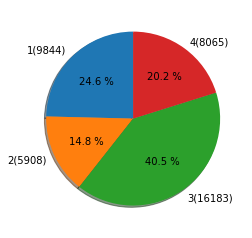

In [6]:
Piechart(num)